DATA SET- FUEL ECONOMY

LINEAR REGRESSION MODEL

In [23]:
#Ankush Talukdar(ML using Python)
#importing libraries and loading data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='white', palette='deep')
warnings.filterwarnings('ignore')
%matplotlib inline
#Importing dataset
df = pd.read_csv("FuelEconomy.csv")
df.head()


,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


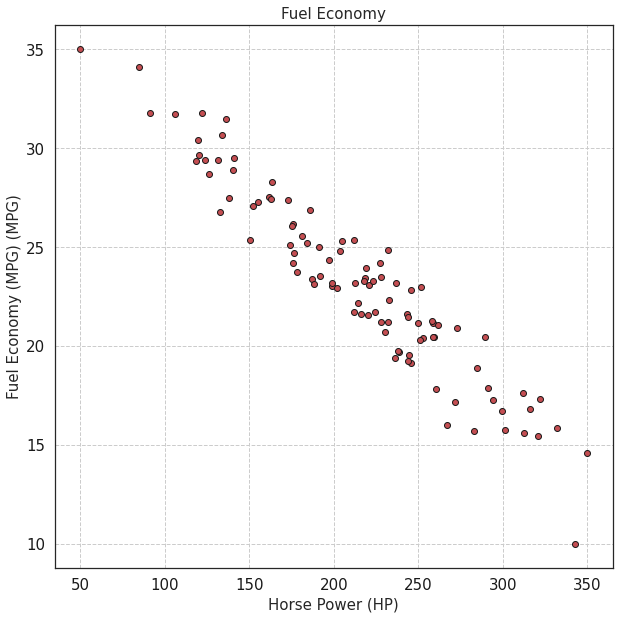

In [3]:
#plotting feaures
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Fuel Economy', fontsize=15)
ax.scatter(df['Horse Power'].values,df['Fuel Economy (MPG)'].values,marker='o', color='r', alpha=1, linewidth=1, 
            edgecolor='k', label='one')
ax.set_xlabel('{} (HP)'.format(df.columns[0]), fontsize=15)
ax.set_ylabel('{} (MPG)'.format(df.columns[1]), fontsize=15)
ax.grid(b=True, which='major', linestyle='--')
ax.tick_params(axis='both', labelsize=15, labelcolor='k')


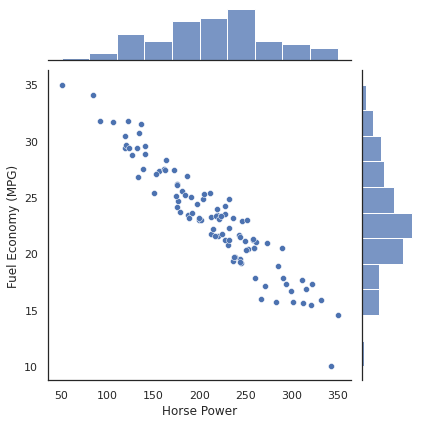

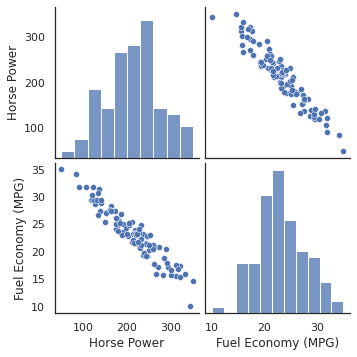

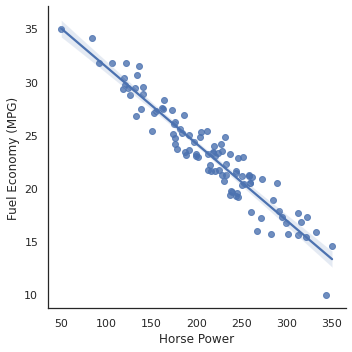

In [4]:
#plotting features with seaborn
sns.jointplot(x=df.columns[0], y=df.columns[1], data=df)
sns.pairplot(df)
sns.lmplot(x=df.columns[0], y=df.columns[1], data=df, palette='deep')


In [5]:
#splitting data into x-axis and y-axis
X=df.drop('Fuel Economy (MPG)', axis=1)
y=df['Fuel Economy (MPG)']

In [6]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((70, 1), (30, 1), (70,), (30,))

In [7]:
#scaling the features
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

In [8]:
#building linear regression model
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression(fit_intercept=True)
lr_regressor.fit(X_train, y_train)

print('Linear Model Coefficient (m): ', lr_regressor.coef_)
print('Linear Model Coefficient (b): ', lr_regressor.intercept_)
y_pred = lr_regressor.predict(X_test)

Linear Model Coefficient (m):  [-4.6136491]
Linear Model Coefficient (b):  23.452507381428575


In [9]:
#predicting test set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

Text(0.5, 1.0, 'Fuel Economy (Training dataset)')

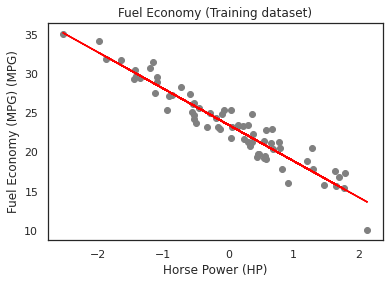

In [10]:
#plotting train set and predictons
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, lr_regressor.predict(X_train), color = 'red')
plt.ylabel('{} (MPG)'.format(df.columns[1]))
plt.xlabel('{} (HP)'.format(df.columns[0]))
plt.title('Fuel Economy (Training dataset)')

Text(0.5, 1.0, 'Fuel Economy (Test dataset)')

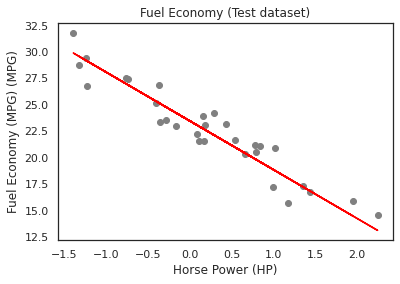

In [11]:
#plotting test set and predictions
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, lr_regressor.predict(X_test), color = 'red')
plt.ylabel('{} (MPG)'.format(df.columns[1]))
plt.xlabel('{} (HP)'.format(df.columns[0]))
plt.title('Fuel Economy (Test dataset)')

# CLUSTERING 

In [24]:
#Ankush Talukdar(ML using Python)
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("FuelEconomy.csv")
df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


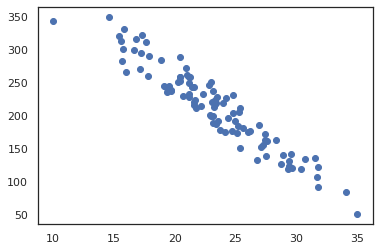

In [14]:
#plotting the data using matplotlib pyplot
plt.scatter(df['Fuel Economy (MPG)'],df['Horse Power'])

In [15]:
"""
for the complex data set we need to find number of clusters. So we need to find the value of K(no.of Clusters) usinng Elbow Method.
First we have to scale the value of colums "Fuel Economy(MPG)" and "Horse Power" 
"""
x=df.drop(columns="Fuel Economy (MPG)")
y=df.drop(columns="Horse Power")
x.to_numpy(),y.to_numpy()

(array([[118.7707988 ],
        [176.3265674 ],
        [219.2624649 ],
        [187.3100089 ],
        [218.5943396 ],
        [175.8381062 ],
        [271.4416078 ],
        [294.4259159 ],
        [126.2110081 ],
        [163.3503346 ],
        [321.840752  ],
        [120.4842359 ],
        [155.4153676 ],
        [191.7148134 ],
        [211.7291092 ],
        [259.1831915 ],
        [236.5717375 ],
        [191.0989631 ],
        [123.8856983 ],
        [136.3064532 ],
        [212.7389563 ],
        [232.4499479 ],
        [122.0401613 ],
        [140.4323131 ],
        [243.3478332 ],
        [178.4302897 ],
        [258.4242233 ],
        [231.8549017 ],
        [ 91.44026398],
        [119.5366581 ],
        [350.        ],
        [175.9792193 ],
        [312.4922095 ],
        [282.6042464 ],
        [138.2647325 ],
        [301.0541818 ],
        [227.8735033 ],
        [ 50.        ],
        [152.3478571 ],
        [252.5523857 ],
        [218.107081  ],
        [172.643

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Fuel Economy (MPG)']=sc.fit_transform(x.to_numpy())
df['Horse Power']=sc.fit_transform(y.to_numpy())
df.head()

,Horse Power,Fuel Economy (MPG)
0,1.317992,-1.536914
1,0.324370,-0.604846
2,0.165347,0.090465
3,0.044045,-0.426978
4,0.053064,0.079645


In [17]:
#After scaling the values we need to find the value of k using Elbow method.
from sklearn.cluster import KMeans
krng=range(1,20)
sse=[]
for i in krng:
    km=KMeans(n_clusters=i)
    km.fit(df[["Horse Power","Fuel Economy (MPG)"]])
    sse.append(km.inertia_)


In [18]:
sse

[200.00000000000003,
 75.00086962523483,
 37.33642586766542,
 23.369999807212338,
 17.145543853705092,
 14.123269243806611,
 11.704392058571006,
 9.454321840552064,
 8.605876113938669,
 7.310556098711221,
 6.571652920057409,
 5.8308232585405815,
 5.236736044981568,
 4.694751910702713,
 4.311007146525786,
 3.9776649996172826,
 3.6762457318680286,
 3.1895604659513523,
 3.072923370405467]

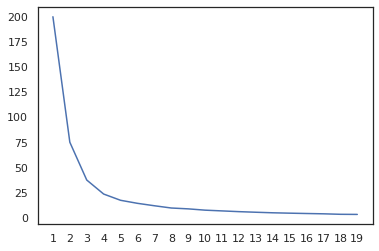

In [19]:
plt.plot(krng,sse)
plt.xticks(range(1,20))
plt.show()

In [20]:
#As we can clearly see, from the above graph  value of k=4 so we need to create a new column cluster .
km=KMeans(n_clusters=4)
df["Cluster"]=km.fit_predict(df[["Horse Power","Fuel Economy (MPG)"]])
df

,Horse Power,Fuel Economy (MPG),Cluster
0,1.317992,-1.536914,3
1,0.324370,-0.604846,0
2,0.165347,0.090465,2
3,0.044045,-0.426978,0
4,0.053064,0.079645,2
...,...,...,...
95,0.906385,-0.823727,0
96,-1.536641,0.861423,1
97,-0.839043,0.488335,2
98,1.354630,-1.177581,3


In [21]:
#We have to divide the data frame in to 4 different clusters as k=4 and plot clusters and centroids using matplotlib
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]

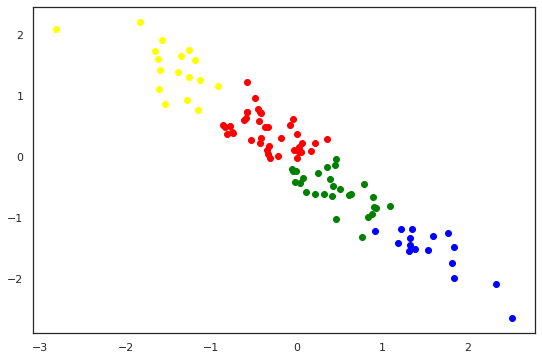

In [22]:
plt.figure(figsize=(9,6))
plt.scatter(df1["Horse Power"],df1["Fuel Economy (MPG)"],color="green",label="Cluster 1")
plt.scatter(df2["Horse Power"],df2["Fuel Economy (MPG)"],color="yellow",label="Cluster 2")
plt.scatter(df3["Horse Power"],df3["Fuel Economy (MPG)"],color="red",label="Cluster 3")
plt.scatter(df4["Horse Power"],df4["Fuel Economy (MPG)"],color="blue",label="Cluster 4")